## Homework 1: Applied Machine Learning

This assignment covers contents of the first three lectures.

The emphasis for this assignment would be on the following:
1. Data Visualization and Analysis
2. Linear Models for Regression and Classification
3. Support Vector Machines

In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from numpy.linalg import inv
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn.svm import LinearSVC, SVC
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1: Data Visualization and Analysis

Data visualization comes in handy when we want to understand data characteristics and read patterns in datasets with thousands of samples and features.

<b>Note: Remember to label plot axes while plotting.</b>

### The dataset to be used for this section is bike_rental.csv.


In [4]:
# Load the dataset
bike_rental_df = pd.read_csv('/content/drive/My Drive/bike_rental.csv')
bike_rental_df

,month,season,holiday,weekday,working_day,weather,temp,feels_temp,humidity,windspeed,casual,registered,count
0,January,winter,No,Saturday,No,cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,January,winter,No,Sunday,No,cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,January,winter,No,Monday,Yes,clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,January,winter,No,Tuesday,Yes,clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,January,winter,No,Wednesday,Yes,clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,December,winter,No,Thursday,Yes,cloudy,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,December,winter,No,Friday,Yes,cloudy,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,December,winter,No,Saturday,No,cloudy,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,December,winter,No,Sunday,No,clear,0.255833,0.231700,0.483333,0.350754,364,1432,1796


<b> 1.1 Create a bar chart to compare the average bike rental count on holiday and non-holiday weekdays. Are there differences in rental patterns? </b>

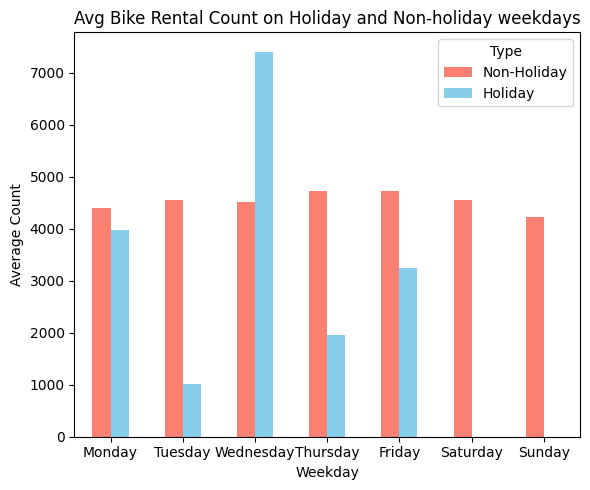

In [17]:
### Code here
# Define colors and their labels
colors = ['Salmon', 'skyblue']
labels = ['Non-Holiday', 'Holiday']

# Prepare data for plotting
avg_counts = bike_rental_df.groupby(['weekday','holiday'])['count'].mean().unstack()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_counts = avg_counts.reindex(order)

# Create the plot
fig, ax = plt.subplots(figsize=(6, 5))
avg_counts.plot(kind='bar', color=colors, ax=ax)

# Setting the title and labels for the plot
ax.set_title("Avg Bike Rental Count on Holiday and Non-holiday weekdays")
ax.set_xlabel("Weekday")
ax.set_ylabel("Average Count")
ax.legend(title="Type", labels=labels)
ax.set_xticklabels(order, rotation=0)

# Adjust layout and display
plt.tight_layout()
plt.show()

In [18]:
### Comment here
# The graph provides a breakdown for individual weekdays. Notably, for non-holidays,
# the average bike rental counts consistently hover above 4,000 across all weekdays, showcasing limited variation.
# However, holidays present a different narrative. On Wednesdays that fall on holidays, the average bike rental
# count significantly surpasses its non-holiday counterpart. For other days, the average bike rental count on holidays
# is less than the average bike rental count when it is not holiday. In particular, the bike rental
# average count on Tuesdays that are holidays are the lowest among all, followed by Thursday and Friday.

<b> 1.2 Plot a small multiple of bar charts to understand data distribution of the following categorical variables. </b>
1. month
2. season
3. working_day
4. weather
<b></b>

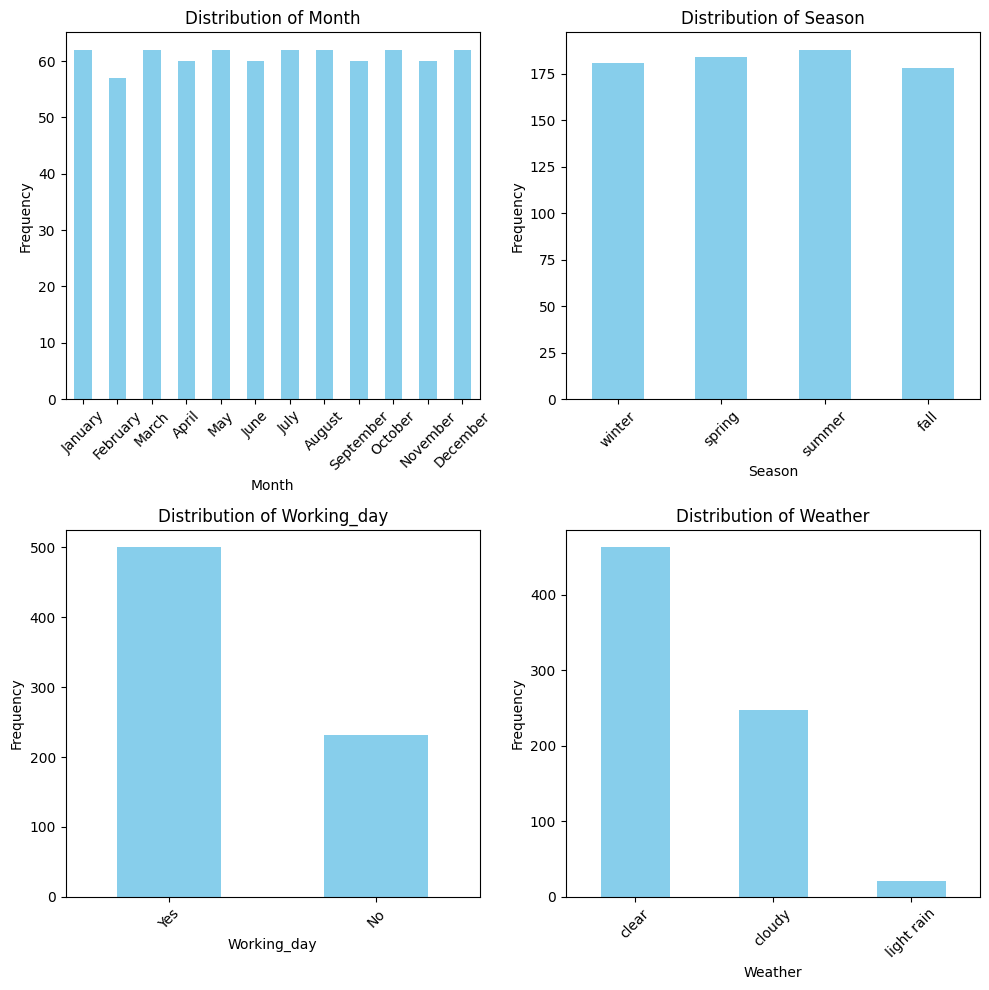

In [19]:
### Code here
# List of categorical variables
variables = ['month', 'season', 'working_day', 'weather']

# Order month and season chronologically
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
season_order = ['winter', 'spring', 'summer', 'fall']

# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for ax, variable in zip(axs.ravel(), variables):
    # Count the frequency of each category
    freq = bike_rental_df[variable].value_counts()

    # Ordering by specific sequence or by size
    if variable == 'month':
        freq = freq.reindex(month_order)
    elif variable == 'season':
        freq = freq.reindex(season_order)
    else:
        # For 'working_day' and 'weather'
        freq = freq.sort_values(ascending=False)

    # Plot bar chart
    freq.plot(kind='bar', ax=ax, color='skyblue')

    # Set title and labels
    ax.set_title(f'Distribution of {variable.capitalize()}')
    ax.set_ylabel('Frequency')
    ax.set_xlabel(variable.capitalize())
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

<b> 1.3 Compare the number of registered and casual bike rentals over time by month. Create a stacked bar chart to show the contributions of each user type. </b>

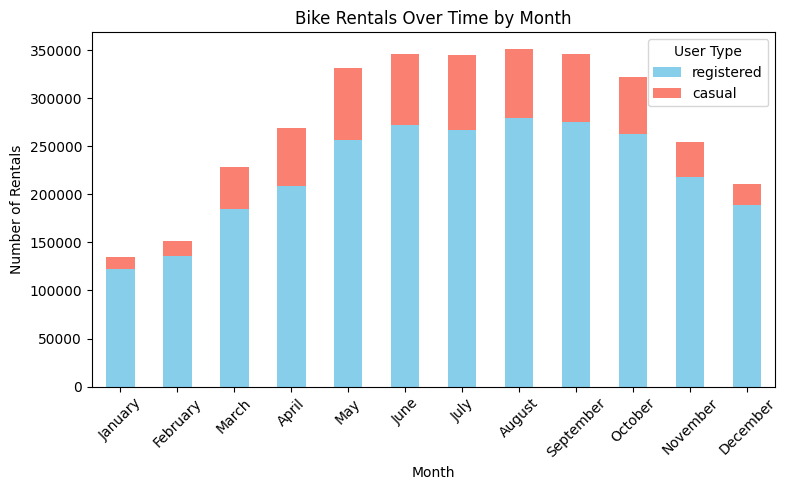

In [21]:
### Code here
# Ensure month ordering
bike_rental_df['month'] = pd.Categorical(bike_rental_df['month'], categories=month_order, ordered=True)

# Group by month and sum 'registered' and 'casual' columns
monthly_data = bike_rental_df.groupby('month').agg({'registered': 'sum', 'casual': 'sum'})

# Plotting
monthly_data.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'salmon'])

# Set titles and labels
plt.title('Bike Rentals Over Time by Month')
plt.ylabel('Number of Rentals')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='User Type')

# Adjust layout
plt.tight_layout()
plt.show()


<b> 1.4 Plot relationships between the following features and the target variable count as a small multiple of scatter plots. </b>

1. temp
2. feels_temp
3. humidity
4. windspeed
<b></b>

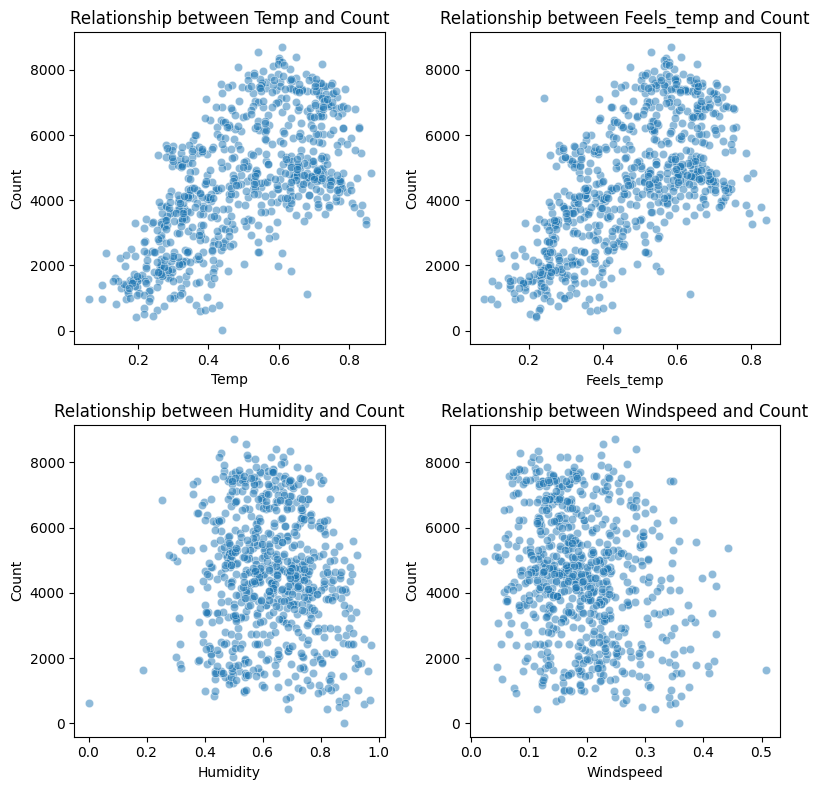

In [22]:
### Code here
# List of features
features = ['temp', 'feels_temp', 'humidity', 'windspeed']

# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for ax, feature in zip(axs.ravel(), features):
    # Scatter plot
    ax.scatter(bike_rental_df[feature], bike_rental_df['count'], alpha=0.5, edgecolors='w', linewidth=0.5)

    # Set title and labels
    ax.set_title(f'Relationship between {feature.capitalize()} and Count')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()


## Part 2: Linear Models for Regression and Classification

In this section, we will be implementing three linear models **linear regression, logistic regression, and SVM**. We will see that despite some of their differences at the surface, these linear models (and many machine learning models in general) are fundamentally doing the same thing - that is, optimizing model parameters to minimize a loss function on data.

### 2.1 Linear Regression


The objective of this dataset is to predict the count of bike rentals based on weather and time. We will use linear regression to predict the count using weather and time.

In [23]:
# split data into features and labels
bike_rental_X = bike_rental_df.drop(columns=['count'])
bike_rental_y = bike_rental_df['count']

**2.1.1 Plot the relationships between the label (count) and the continuous features (temp, feels_temp, humidity, windspeed, casual, registered) using a small multiple of scatter plots. Make sure to label the axes.**

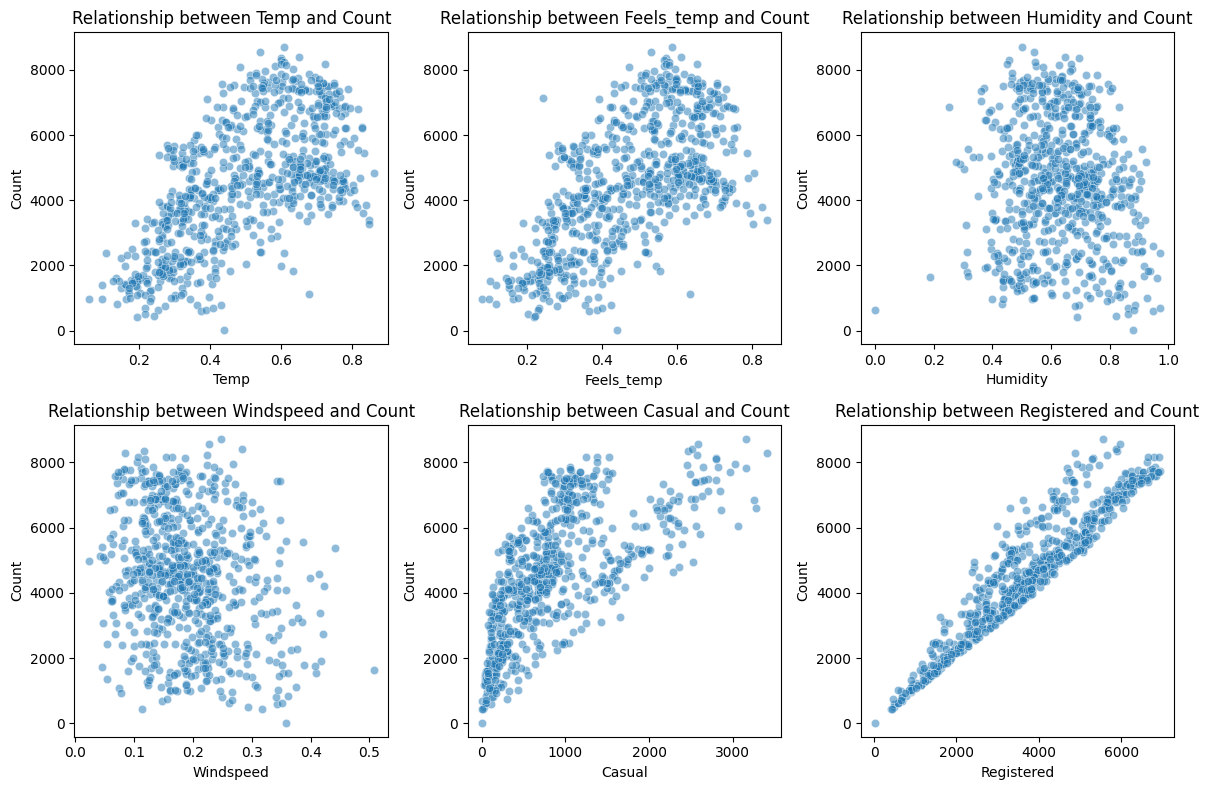

In [24]:
### Code here
# List of continuous features
features = ['temp', 'feels_temp', 'humidity', 'windspeed', 'casual', 'registered']

# Setting up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))  # Adjusted for 6 features

for ax, feature in zip(axs.ravel(), features):
    # Scatter plot
    ax.scatter(bike_rental_X[feature], bike_rental_y, alpha=0.5, edgecolors='w', linewidth=0.5)

    # Set title and labels
    ax.set_title(f'Relationship between {feature.capitalize()} and Count')
    ax.set_ylabel('Count')
    ax.set_xlabel(feature.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()


**2.1.2 From the visualizations above, do you think linear regression is a good model for this problem? Why and/or why not? Please explain.**

In [26]:
### Comment here
# No. I do not think the linear regression is good model for this problem.
# First, for temp, feels_temp, humidity, windspeed, the linear relationship between them
# and count are weak from the charts above. For casual and registered, the existence of
# heteroscedasticity can be seen. As their value become bigger, the variance enlarges,
# this violates homoscedasticity assumption for linear regression.

### Data Preprocessing

Before we can fit a linear regression model, there are several pre-processing steps we should apply to the datasets:

1. Encode categorial features appropriately.
2. Remove highly collinear features by reading the correlation plot.
3. Split the dataset into training (60%), validation (20%), and test (20%) sets.
4. Standardize the columns in the feature matrices X_train, X_val, and X_test to have zero mean and unit variance. To avoid information leakage, learn the standardization parameters (mean, variance) from X_train, and apply it to X_train, X_val, and X_test.
5. Add a column of ones to the feature matrices X_train, X_val, and X_test. This is a common trick so that we can learn a coefficient for the bias term of a linear model.


**2.1.3 Encode the categorical variables of the Bike Rental dataset.**

In [27]:
### Code here
# List out the categorical variables
categorical_vars = ['month', 'season', 'holiday', 'weekday', 'working_day', 'weather']

# Use get_dummies to perform one-hot encoding
bike_rental_encoded_X = pd.get_dummies(bike_rental_X, columns=categorical_vars, drop_first=True)

**2.1.4 Plot the correlation matrix, and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop one from each pair of highly correlated features from the dataframe. Why is necessary to drop those columns before proceeding further?**

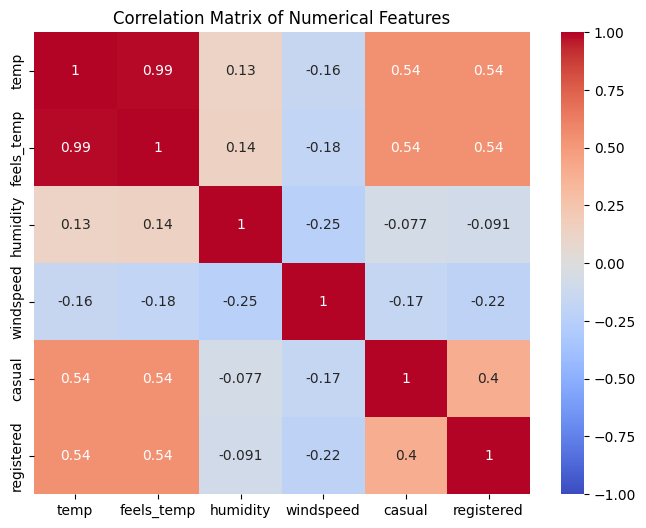

In [28]:
### Code here
# Selecting only the numerical features for the correlation matrix
numerical_features = ['temp', 'feels_temp', 'humidity', 'windspeed', 'casual', 'registered']
correlation_matrix = bike_rental_df[numerical_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


In [29]:
### Code here
to_drop = set()  # to store features to drop
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.9:
            colname_i = correlation_matrix.columns[i]  # getting the name of column i
            colname_j = correlation_matrix.columns[j]  # getting the name of column j
            to_drop.add(colname_i)  # add one of them to the drop list

# Drop the identified columns
bike_rental_encoded_X = bike_rental_encoded_X.drop(columns=to_drop)

In [30]:
### Comment here
# The regression coefficient for an independent variable represents the mean change in
# the dependent variable for a one-unit change in that independent variable, holding all
# other independent variables constant. However, when independent variables are highly correlated,
# one unit changes in one variable will also cause shifts in its correlated variables. This will make
# model difficult to estimate the coefficients, thereby increasing the complexity of the model.
# In the mean time, it can create noise and make the coefficient estimates unstable (high variance). Last but not least,
# dropping one of the two highly correlated models will not worsen the performance the model, because it
# does not bring additional information to the model.

**2.1.5 Split the dataset into training (60%), validation (20%), and test (20%) sets.**

In [31]:
#Drop register and casual
bike_rental_encoded_X = bike_rental_encoded_X.drop(columns=['registered', 'casual'])

In [32]:
### Code here
bike_rental_X_train, bike_rental_X_temp, bike_rental_y_train, bike_rental_y_temp = train_test_split(bike_rental_encoded_X, bike_rental_y, test_size=0.4, random_state=42)

# Splitting the temporary set into validation (50% of 40% => 20%) and test sets (50% of 40% => 20%)
bike_rental_X_val, bike_rental_X_test, bike_rental_y_val, bike_rental_y_test = train_test_split(bike_rental_X_temp, bike_rental_y_temp, test_size=0.5, random_state=42)

**2.1.6 Standardize the columns in the feature matrices.**

In [33]:
### Code here
# Initialize the scaler using the training data
scaler = StandardScaler()

# Initalize and fit the scaler only using the training data
scaler.fit(bike_rental_X_train)

# Standardize them in train, val and test sets
bike_rental_X_train = scaler.transform(bike_rental_X_train)
bike_rental_X_val = scaler.transform(bike_rental_X_val)
bike_rental_X_test = scaler.transform(bike_rental_X_test)

In [34]:
# Adding a column of ones to the feature matrices for the bias term.
bike_rental_X_train = np.hstack([np.ones((bike_rental_X_train.shape[0], 1)), bike_rental_X_train])
bike_rental_X_val = np.hstack([np.ones((bike_rental_X_val.shape[0], 1)), bike_rental_X_val])
bike_rental_X_test = np.hstack([np.ones((bike_rental_X_test.shape[0], 1)), bike_rental_X_test])

At the end of this pre-processing, you should have the following vectors and matrices:
- Bike Rental Prediction dataset: bike_rental_X_train, bike_rental_X_val, bike_rental_X_test, bike_rental_y_train, bike_rental_y_val, bike_rental_y_test

### Implement Linear Regression

Now, we can implement our linear regression model! Specifically, we will be implementing ridge regression, which is linear regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for linear regression is:

$$
y = X w
$$

Note that we can omit the bias term here because we have included a column of ones in our $X$ matrix, so the bias term is learned implicitly as a part of $w$. This will make our implementation easier.

Our objective in linear regression is to learn the weights $w$ which best fit the data. This notion can be formalized as finding the optimal $w$ which minimizes the following loss function:

$$
\min_{w} \| X w - y \|^2_2 + \alpha \| w \|^2_2 \\
$$

This is the ridge regression loss function. The $\| X w - y \|^2_2$ term penalizes predictions $Xw$ which are not close to the label $y$. And the $\alpha \| w \|^2_2$ penalizes large weight values, to favor a simpler, more generalizable model. The $\alpha$ hyperparameter, known as the regularization parameter, is used to tune the complexity of the model - a higher $\alpha$ results in smaller weights and lower complexity, and vice versa. Setting $\alpha = 0$ gives us vanilla linear regression.

Conveniently, ridge regression has a closed-form solution which gives us the optimal $w$ without having to do iterative methods such as gradient descent. The closed-form solution, known as the Normal Equations, is given by:

$$
w = (X^T X + \alpha I)^{-1} X^T y
$$

**2.1.7 Implement a `LinearRegression` class with two methods: `train` and `predict`.**

**Note: You may NOT use sklearn for this implementation. You may, however, use `np.linalg.solve` to find the closed-form solution. It is highly recommended that you vectorize your code.**

In [35]:
  class LinearRegression():
      '''
      Linear regression model with L2-regularization (i.e. ridge regression).

      Attributes
      ----------
      alpha: regularization parameter
      w: (n x 1) weight vector
      '''

      def __init__(self, alpha=0):
          self.alpha = alpha
          self.w = None

      def train(self, X, y):
          '''Trains model using ridge regression closed-form solution
          (sets w to its optimal value).

          Parameters
          ----------
          X : (m x n) feature matrix
          y: (m x 1) label vector

          Returns
          -------
          None
          '''
          # Identity matrix of shape (n, n)
          I = np.identity(X.shape[1])

          # Compute the weight using the closed-form solution
          self.w = np.linalg.solve(X.T @ X + self.alpha * I, X.T @ y)


          return None

      def predict(self, X):
          '''Predicts on X using trained model.

          Parameters
          ----------
          X : (m x n) feature matrix

          Returns
          -------
          y_pred: (m x 1) prediction vector
          '''
          return X @ self.w



### Train, Evaluate, and Interpret LR Model

**2.1.8 Train a linear regression model ($\alpha = 0$) on the bike rental training data. Make predictions and report the $R^2$ score on the training, validation, and test sets. Report the first 3 and last 3 predictions on the test set, along with the actual labels.**

In [38]:
def get_report(y_pred, y_test):
    """
    function to Report the first 3 and last 3 predictions on X_test,
    along with the actual labels in y_test.

    Returns a dataframe with 6 rows.
    """
    preds = np.concatenate([y_pred[:3], y_pred[-3:]])
    actuals = np.concatenate([y_test[:3], y_test[-3:]])
    df_compare = pd.DataFrame({'Prediction': preds,
                               'Actual':actuals})
    df_compare['Position'] = [1, 2, 3, len(y_pred) - 2, len(y_pred) - 1, len(y_pred)]
    df_compare = df_compare.set_index('Position')
    return df_compare

In [39]:
### Code here
# Train the model
model = LinearRegression(alpha=0)
model.train(bike_rental_X_train, bike_rental_y_train)

for X, y, name in [(bike_rental_X_train, bike_rental_y_train, "Training"), (bike_rental_X_val, bike_rental_y_val, "Validation"), (bike_rental_X_test, bike_rental_y_test, "Test")]:
    predictions = model.predict(X)
    print(f"R2 score for {name} set: {r2_score(y, predictions):.4f}")

# Report the first 3 and last 3 predictions on the test set
print(get_report(model.predict(bike_rental_X_test), bike_rental_y_test.values))

R2 score for Training set: 0.5990
R2 score for Validation set: 0.5326
R2 score for Test set: 0.5422
           Prediction  Actual
Position                     
1         4787.265096    3940
2         5733.895508    7132
3         2174.857758     705
145       5504.144799    7534
146       3951.633970    4118
147       2167.033838    1834


**2.1.9 As a baseline model, use the mean of the training labels (bike_rental_y_train) as the prediction for all instances. Report the $R^2$ on the training, validation, and test sets using this baseline.**

>This is a common baseline used in regression problems and tells you if your model is any good. Your linear regression $R^2$ should be much higher than these baseline $R^2$.

In [40]:
### Code here
# Calculate the mean of the training labels
mean_train = np.mean(bike_rental_y_train)

# Use this mean as the prediction for all instances
train_pred = [mean_train] * len(bike_rental_y_train)
val_pred = [mean_train] * len(bike_rental_y_val)
test_pred = [mean_train] * len(bike_rental_y_test)

# Compute the R2 score
r2_train = r2_score(bike_rental_y_train, train_pred)
r2_val = r2_score(bike_rental_y_val, val_pred)
r2_test = r2_score(bike_rental_y_test, test_pred)

# Report the results
print(f"R2 score using mean baseline for Training set: {r2_train:.4f}")
print(f"R2 score using mean baseline for Validation set: {r2_val:.4f}")
print(f"R2 score using mean baseline for Test set: {r2_test:.4f}")

R2 score using mean baseline for Training set: 0.0000
R2 score using mean baseline for Validation set: -0.0209
R2 score using mean baseline for Test set: -0.0048


**2.1.10 Interpret your model trained on the bike rental dataset using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

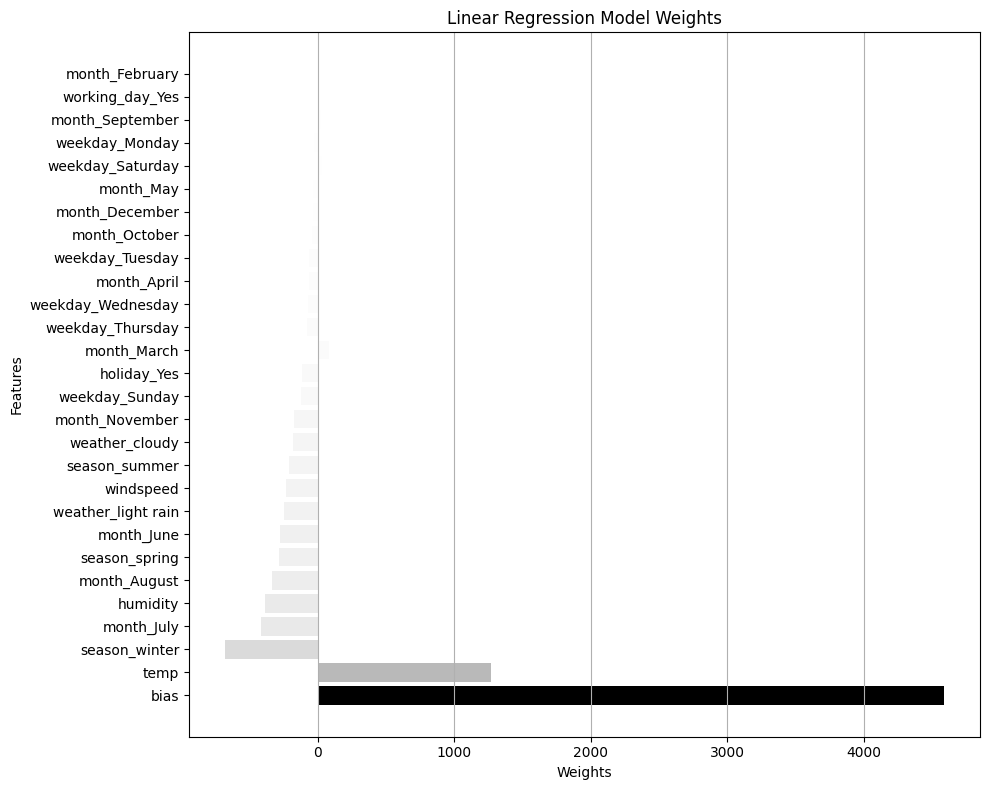

In [41]:
### Code here
weights = model.w

# Extracting feature names
# Add 'bias' for the bias term at the start
features = ['bias'] + bike_rental_encoded_X.columns.values.tolist()
# Creating a DataFrame for sorting
df_weights = pd.DataFrame({
    'Features': features,
    'Weights': weights
})

# Sorting by absolute weight value
df_weights = df_weights.reindex(df_weights.Weights.abs().sort_values(ascending=False).index)

# Plotting

# Create a color map
cmap = plt.get_cmap('binary')
# Normalize values to 0-1
norm = plt.Normalize(df_weights.Weights.abs().min(), df_weights.Weights.abs().max())

# Apply the color map
colors = cmap(norm(df_weights.Weights.abs()))
plt.figure(figsize=(10, 8))
plt.barh(df_weights['Features'], df_weights['Weights'], color=colors)  # barh is for horizontal bar chart
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Linear Regression Model Weights')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

**2.1.11 According to your model, which features are the greatest contributors to the car price?**

In [42]:
### Comment here
# Based on the graph above, we can see that temp has the largest weight among all,
# therefore, it is the greatest contributor to the rental count, followed by
# season_winter, mnth_July and humidity. This is becasue increasing these features by
# one unit, changes the rental count by their weights. The higher the weight,
# the greater contribution they affect the dependent variable count.

### Hyperparameter Tuning ($\alpha$)

Now, let's do ridge regression and tune the $\alpha$ regularization parameter on the bike rental dataset.

**2.1.12 Sweep out values for $\alpha$ using alphas = np.logspace(-5, 1, 20). Perform a grid search over these $\alpha$ values, recording the training and validation $R^2$ for each $\alpha$. A simple grid search is fine, no need for k-fold cross validation. Plot the training and validation $R^2$ as a function of $\alpha$ on a single figure. Make sure to label the axes and the training and validation $R^2$ curves. Use a log scale for the x-axis.**

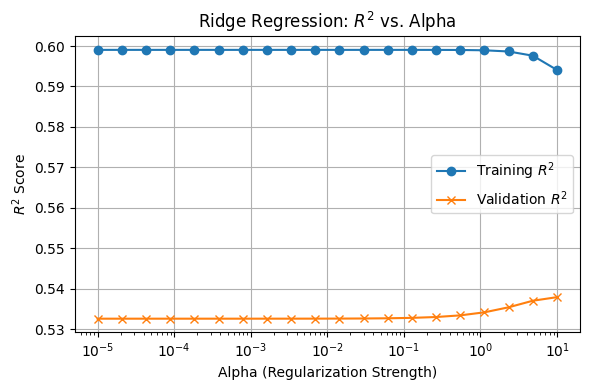

In [43]:
### Code here
alphas = np.logspace(-5, 1, 20) # Values for alpha
train_scores = []  # List to store R^2 values on the training set
val_scores = []    # List to store R^2 values on the validation set

# Loop through the alpha values
for alpha in alphas:
    # Create and train a model with the current alpha
    model = LinearRegression(alpha=alpha)
    model.train(bike_rental_X_train, bike_rental_y_train)

    # Predict on training set and compute R^2
    train_pred = model.predict(bike_rental_X_train)
    train_r2 = r2_score(bike_rental_y_train, train_pred)
    train_scores.append(train_r2)

    # Predict on validation set and compute R^2
    val_pred = model.predict(bike_rental_X_val)
    val_r2 = r2_score(bike_rental_y_val, val_pred)
    val_scores.append(val_r2)

# Plotting
plt.figure(figsize=(6,4))
plt.plot(alphas, train_scores, marker='o', label='Training $R^2$')
plt.plot(alphas, val_scores, marker='x', label='Validation $R^2$')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('$R^2$ Score')
plt.title('Ridge Regression: $R^2$ vs. Alpha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**2.1.13 Explain your plot above. How do training and validation $R^2$ behave with decreasing model complexity (increasing $\alpha$)?**

In [44]:
### Comment here
# As alpha increases, it penalizes the magnitude of the coefficients in the linear
# regression model, and the model complexity decreases. Based on the graph above,
# we can see that when alpha is still small, the penalty on the coefficients is also small,
# the training R squared did not change because the model's complexity is still high
# enough to fit the training data well. As alpha continues to increase, the training
# R squared starts to drop becuase the model becomes less flexible and will not be able
# fit the training data so well as before. However, the validation R squared starts to
# increases, the gap between training R squared and validation R squared becomes smaller,
# this is because the model overfits when the alpha is very small. As regularization
# increases, the model has lower variance and becomes less prone to overfitting.
# As alpha continues to increase, the training and validation R squared will meet, and
# drops together when the model starts to underfit.

### 2.2 Logistic Regression

**2.2.1 Load the dataset, the dataset to be used is loan_data.csv**

In [45]:
### Code here
loan_data_df = pd.read_csv('/content/drive/My Drive/loan_data.csv')

In [46]:
loan_data_df = loan_data_df.drop(columns=['Loan_ID'])

**2.2.2 Are there any missing values in the dataset? If so, what is the best way to deal with it and why?**

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


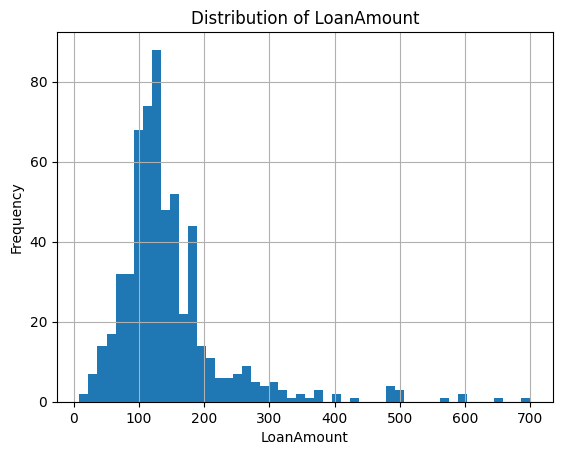

In [47]:
### Code here
missing_values = loan_data_df.isnull().sum()
print(missing_values)

#Check the distribution for 'LoanAmount'
loan_data_df['LoanAmount'].hist(bins=50)
plt.xlabel('LoanAmount')
plt.ylabel('Frequency')
plt.title('Distribution of LoanAmount')
plt.show()

In [48]:
### Code here
# Drop the rows when 'Married' is missing
loan_data_df = loan_data_df.dropna(subset=['Married']).copy()

#For categorical columns, replace missing values with mode
columns_to_replace = ['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']

for column in columns_to_replace:
    mode_value = loan_data_df[column].mode().iloc[0]
    loan_data_df[column].fillna(mode_value, inplace=True)
#For numerical column LoanAmount, replace missing values with the median
mean_value = loan_data_df['LoanAmount'].median()
loan_data_df['LoanAmount'].fillna(mean_value, inplace=True)

In [49]:
### Comment here
# For Married, since only 3 values are missing, just drop the rows, and we will not miss much data.
# For categorical features, we replace the missing values with mode. This is because
# it is simple and fast, and it keeps the data consistent and does not introduce new values.
# Although 'Load_Amount_Term' are numbers, but we treat it as categorical here, since
# it only contain certain values, and we do not want to introduct new values.
# Note: This is under the assumption that they are missing completely at random.
# For the numerical feature 'LoanAmount', we replace it with the median instead of mean, because
# it is right skewed, and median is more robust to outliers than mean.

**2.2.3 Encode the categorical variables.**

In [50]:
### Code here
# Label Encoding for binary categories
loan_data_df['Gender'] = loan_data_df['Gender'].map({'Female': 0, 'Male': 1})
loan_data_df['Married'] = loan_data_df['Married'].map({'No': 0, 'Yes': 1})
loan_data_df['Education'] = loan_data_df['Education'].map({'Not Graduate': 0, 'Graduate': 1})
loan_data_df['Self_Employed'] = loan_data_df['Self_Employed'].map({'No': 0, 'Yes': 1})
loan_data_df['Loan_Status'] = loan_data_df['Loan_Status'].map({'N': 0, 'Y': 1})

# Ordinal encoding for Dependents
mapping = {'0': 0, '1': 1, '2': 2, '3+': 3}
loan_data_df['Dependents'] = loan_data_df['Dependents'].replace(mapping)

# One Hot Encoding for Property_Area
loan_data_df = pd.get_dummies(loan_data_df, columns=['Property_Area'], drop_first=True)

**2.2.4 Do you think that the distribution of labels is balanced? Why/why not? Hint: Find the probability of the different categories.**

In [51]:
### Code here
label_distribution = loan_data_df['Loan_Status'].value_counts(normalize=True)
print(label_distribution)

1    0.685761
0    0.314239
Name: Loan_Status, dtype: float64


In [52]:
### Comment here
# Based on the probabilities we found above, the distribution of labels is imbalanced.
# the 'Y' Loan_Status dominates ~68.6% the dataset, and the 'N' Loan_Status only occupies
# ~31.4% of the dataset. In a balanced dataset, each class should have a 50-50 split.

**2.2.5 Plot the correlation matrix (first separate features and Y variable), and check if there is high correlation between the given numerical features (Threshold >=0.9). If yes, drop those highly correlated features from the dataframe.**

In [53]:
### Code here
X = loan_data_df.drop('Loan_Status', axis=1)
y = loan_data_df['Loan_Status']

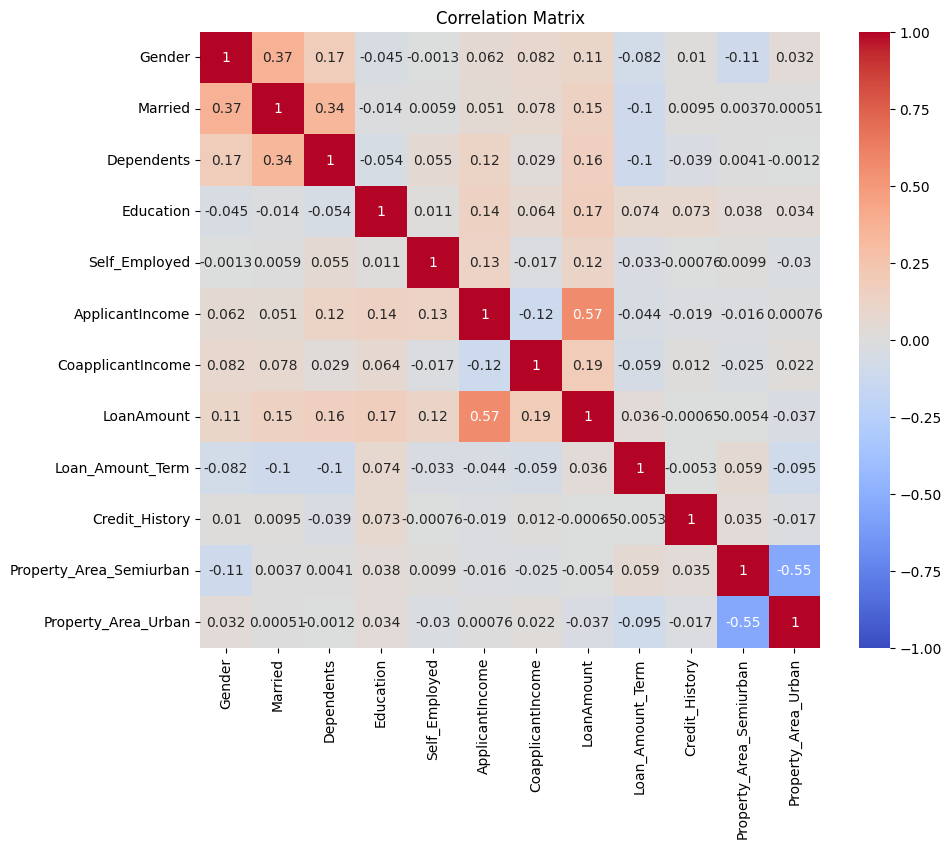

In [54]:
### Code here
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [55]:
### Code here
#Drop the highly correlated feature if there is any
to_drop = set()  # to store features to drop
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.9:
            colname_i = correlation_matrix.columns[i]  # getting the name of column i
            colname_j = correlation_matrix.columns[j]  # getting the name of column j
            to_drop.add(colname_i)  # add one of them to the drop list

# Drop the identified columns
X = X.drop(columns=to_drop)

**2.2.6 Apply the following pre-processing steps:**

1. Convert the label from a Pandas series to a Numpy (m x 1) vector. If you don't do this, it may cause problems when implementing the logistic regression model.
2. Split the dataset into training (60%), validation (20%), and test (20%) sets.
3. Standardize the columns in the feature matrices. To avoid information leakage, learn the standardization parameters from training, and then apply training, validation and test dataset.
4. Add a column of ones to the feature matrices of train, validation and test dataset. This is a common trick so that we can learn a coefficient for the bias term of a linear model.

In [56]:
### Code here
y = np.array(y).reshape(-1, 1)

# Split the dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

# Standardize the columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Add a column of ones to the feature
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_val = np.hstack([np.ones((X_val.shape[0], 1)), X_val])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

### Implement Logisitc Regression

We will now implement logistic regression with L2 regularization. Given an (m x n) feature matrix $X$, an (m x 1) label vector $y$, and an (n x 1) weight vector $w$, the hypothesis function for logistic regression is:

$$
y = \sigma(X w)
$$

where $\sigma(x) = \frac{1}{1 + e^{-x}}$, i.e. the sigmoid function. This function scales the prediction to be a probability between 0 and 1, and can then be thresholded to get a discrete class prediction.

Just as with linear regression, our objective in logistic regression is to learn the weights $𝑤$ which best fit the data. For L2-regularized logistic regression, we find an optimal $w$ to minimize the following loss function:

$$
\min_{w} \ -y^T \ \text{log}(\sigma(Xw)) \ - \  (\mathbf{1} - y)^T \ \text{log}(\mathbf{1} - \sigma(Xw)) \ + \ \alpha \| w \|^2_2 \\
$$

Unlike linear regression, however, logistic regression has no closed-form solution for the optimal $w$. So, we will use gradient descent to find the optimal $w$. The (n x 1) gradient vector $g$ for the loss function above is:

$$
g = X^T \Big(\sigma(Xw) - y\Big) + 2 \alpha w
$$

Below is pseudocode for gradient descent to find the optimal $w$. You should first initialize $w$ (e.g. to a (n x 1) zero vector). Then, for some number of epochs $t$, you should update $w$ with $w - \eta g $, where $\eta$ is the learning rate and $g$ is the gradient. You can learn more about gradient descent [here](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM).

> $w = \mathbf{0}$
>
> $\text{for } i = 1, 2, ..., t$
>
> $\quad \quad w = w - \eta g $


**A LogisticRegression class with five methods: train, predict, calculate_loss, calculate_gradient, and calculate_sigmoid has been implemented for you below.**

In [57]:
class LogisticRegression():
    '''
    Logistic regression model with L2 regularization.

    Attributes
    ----------
    alpha: regularization parameter
    t: number of epochs to run gradient descent
    eta: learning rate for gradient descent
    w: (n x 1) weight vector
    '''

    def __init__(self, alpha=0, t=100, eta=1e-3):
        self.alpha = alpha
        self.t = t
        self.eta = eta
        self.w = None

    def train(self, X, y):
        '''Trains logistic regression model using gradient descent
        (sets w to its optimal value).

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        losses: (t x 1) vector of losses at each epoch of gradient descent
        '''

        loss = list()
        self.w = np.zeros((X.shape[1],1))
        for i in range(self.t):
            self.w = self.w - (self.eta * self.calculate_gradient(X, y))
            loss.append(self.calculate_loss(X, y))
        return loss

    def predict(self, X):
        '''Predicts on X using trained model. Make sure to threshold
        the predicted probability to return a 0 or 1 prediction.

        Parameters
        ----------
        X : (m x n) feature matrix

        Returns
        -------
        y_pred: (m x 1) 0/1 prediction vector
        '''
        y_pred = self.calculate_sigmoid(X.dot(self.w))
        y_pred[y_pred >= 0.5] = 1
        y_pred[y_pred < 0.5] = 0
        return y_pred

    def calculate_loss(self, X, y):
        '''Calculates the logistic regression loss using X, y, w,
        and alpha. Useful as a helper function for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        loss: (scalar) logistic regression loss
        '''
        return -y.T.dot(np.log(self.calculate_sigmoid(X.dot(self.w)))) - (1-y).T.dot(np.log(1-self.calculate_sigmoid(X.dot(self.w)))) + self.alpha*np.linalg.norm(self.w, ord=2)**2

    def calculate_gradient(self, X, y):
        '''Calculates the gradient of the logistic regression loss
        using X, y, w, and alpha. Useful as a helper function
        for train().

        Parameters
        ----------
        X : (m x n) feature matrix
        y: (m x 1) label vector

        Returns
        -------
        gradient: (n x 1) gradient vector for logistic regression loss
        '''
        return X.T.dot(self.calculate_sigmoid( X.dot(self.w)) - y) + 2*self.alpha*self.w


    def calculate_sigmoid(self, x):
        '''Calculates the sigmoid function on each element in vector x.
        Useful as a helper function for predict(), calculate_loss(),
        and calculate_gradient().

        Parameters
        ----------
        x: (m x 1) vector

        Returns
        -------
        sigmoid_x: (m x 1) vector of sigmoid on each element in x
        '''
        return (1)/(1 + np.exp(-x.astype('float')))

**2.2.7 Plot Loss over Epoch and Search the space randomly to find best hyperparameters.**

i) Using your implementation above, train a logistic regression model **(alpha=0, t=100, eta=1e-3)** on the loan training data. Plot the training loss over epochs. Make sure to label your axes. You should see the loss decreasing and start to converge.

ii) Using **alpha between (0,1), eta between(0, 0.001) and t between (0, 100)**, find the best hyperparameters for LogisticRegression. You can randomly search the space 20 times to find the best hyperparameters.

iii) Compare accuracy on the test dataset for both the scenarios.

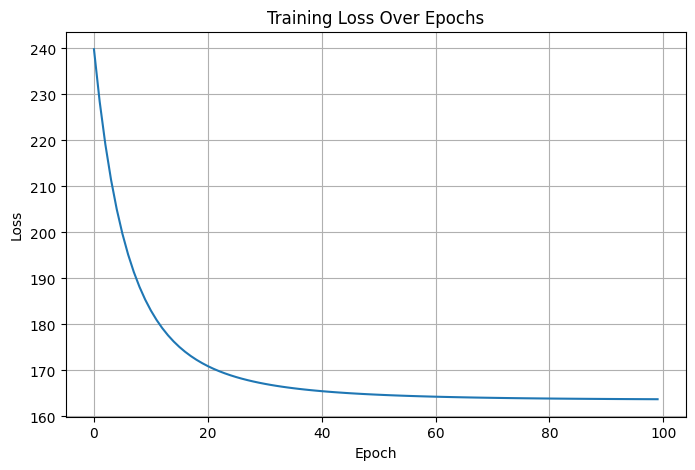

In [58]:
### Code here
# Assuming the training data is split into train_loan_X (features) and train_loan_y (labels)
# Instantiate the model
model_first = LogisticRegression(alpha=0, t=100, eta=1e-3)

# Train the model
losses = model_first.train(X_train, y_train)
losses = np.array(losses).reshape(-1)
# Plot the training loss
plt.figure(figsize=(8,5))
plt.plot(range(len(losses)), losses)
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [59]:
### Code here
# Define the bounds for the hyperparameters
alpha_bounds = [0, 1]
eta_bounds = [0, 0.001]
t_bounds = [0, 100]

best_model = None
best_acc = -float('inf')  # Set an initial high loss value
pred_values = []
# Random search 20 times
for _ in range(20):
    # Randomly sample hyperparameters within the bounds
    alpha = np.random.uniform(alpha_bounds[0], alpha_bounds[1])
    eta = np.random.uniform(eta_bounds[0], eta_bounds[1])
    t = np.random.randint(t_bounds[0], t_bounds[1])
    # Initialize and train model with the sampled hyperparameters
    model_second = LogisticRegression(alpha=alpha, t=t, eta=eta)
    model_second.train(X_train, y_train)
    # Evaluate on validation set
    y_pred_val = model_second.predict(X_val)
    pred_values.append(y_pred_val)
    # Calculate accuracy
    correct_predictions = (y_pred_val == y_val).sum()

    acc_val = correct_predictions / len(y_val)
    # Update best hyperparameters if this is the best model so far
    if acc_val > best_acc:
        best_acc = acc_val
        best_model = model_second

In [60]:
### Code here
pred_first = model_first.predict(X_test)
pred_sec = best_model.predict(X_test)
acc_first = np.mean(pred_first == y_test)
acc_sec = np.mean(pred_sec == y_test)

In [61]:
### Code here
# Compare the accuracy for both scenarios
print(f"First case: {acc_first}, Second case: {acc_sec}")

First case: 0.8211382113821138, Second case: 0.8292682926829268


### Feature Importance

**2.2.8 Interpret your trained model using a bar chart of the model weights. Make sure to label the bars (x-axis) and don't forget the bias term!**

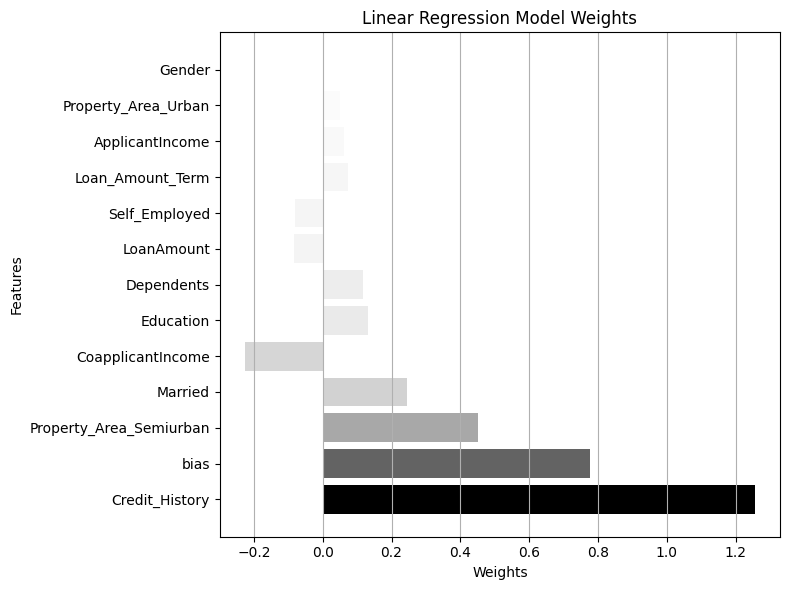

In [62]:
### Code here
# Assuming best_model is the trained logistic regression model
weights = best_model.w.ravel()  # Flatten the weights for plotting

# Add 'bias' for the bias term at the start
features = ['bias'] + X.columns.values.tolist()

# Creating a DataFrame for sorting
df_weights = pd.DataFrame({
    'Features': features,
    'Weights': weights
})

# Sorting by absolute weight value
df_weights = df_weights.reindex(df_weights.Weights.abs().sort_values(ascending=False).index)

#Plotting
# Create a color map
cmap = plt.get_cmap('binary')
# Normalize values to 0-1
norm = plt.Normalize(df_weights.Weights.abs().min(), df_weights.Weights.abs().max())

# Apply the color map
colors = cmap(norm(df_weights.Weights.abs()))
plt.figure(figsize=(8, 6))
plt.barh(df_weights['Features'], df_weights['Weights'], color=colors)  # barh is for horizontal bar chart
plt.xlabel('Weights')
plt.ylabel('Features')
plt.title('Linear Regression Model Weights')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [63]:
### Comment here
# Credit_History turns out to be the most important feature in predicting the loan_status,
# followed by Property_area_semiurban and CoapplicantIncome.

### 2.3 Support Vector Machines

In this part, we will be using support vector machines for classification on the loan dataset.

### Train Primal SVM
**2.3.1 Train a primal SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [64]:
### Code here
from sklearn.metrics import accuracy_score

# Separating features (X) and target label (y)
X = loan_data_df.drop('Loan_Status', axis=1)
y = loan_data_df['Loan_Status']

# Splitting the dataset
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

#Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and train the Support Vector Classifier
svm_clf = LinearSVC(dual = False)
svm_clf.fit(X_train, y_train)

# Report accuracy on train, val and test
y_train_pred = svm_clf.predict(X_train)
y_val_pred = svm_clf.predict(X_val)
y_test_pred = svm_clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8005464480874317
Validation Accuracy: 0.7950819672131147
Test Accuracy: 0.8536585365853658


### Train Dual SVM
**2.3.2 Train a dual SVM (with default parameters) on the loan dataset. Make predictions and report the accuracy on the training, validation, and test sets.**

In [73]:
### Code here
svm_clf = LinearSVC(dual = True, max_iter = 10000)

# Initialize and train the Support Vector Classifier
svm_clf.fit(X_train, y_train)
y_train_pred = svm_clf.predict(X_train)

# Report accuracy on train, val and test
y_val_pred = svm_clf.predict(X_val)
y_test_pred = svm_clf.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8005464480874317
Validation Accuracy: 0.7950819672131147
Test Accuracy: 0.8536585365853658
